# Belmont & Sacerdote Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set the max columns to none
pd.set_option('display.max_columns', None)

## Original data

In [2]:
bs_raw_data = pd.read_stata("../data/sacerdote/house_senate_merged_dataset.dta")
bs_raw_data[:5]

C:\Users\Yiyan\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\io\stata.py:1457: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,Model,ticker,uid,evtdate,DATE,evttime,ret,abret_carhart,unique_id2,evtdateA,date,permno,mktrf,smb,hml,rf,umd,PERMNO,n,RET,alpha,b_mkt,b_smb,b_hml,b_umd,ivol,tvol,R2,exret,permco,prc,shrout,siccd,yearmonth,bm,cap,lagged_cap,mo6,cap_quint,mo_quint,bm_quint,sic_size_group,mo_size_bm_group,ret_ind_size,ret_mo_size_bm,N_ind_size,N_mo_size_bm,mkt,abret,index_abret,abretm100_0,abretm10_0,abret0_10,abret0_20,abret0_60,abret0_127,abret0_100,abret0_255,index_abret_carhart,abret_carhartm100_0,abret_carhartm10_0,abret_carhart0_10,abret_carhart0_20,abret_carhart0_60,abret_carhart0_127,abret_carhart0_100,abret_carhart0_255,index_ret,retm100_0,retm10_0,ret0_10,ret0_20,ret0_60,ret0_127,ret0_100,ret0_255,index_mkt,mktm100_0,mktm10_0,mkt0_10,mkt0_20,mkt0_60,mkt0_127,mkt0_100,mkt0_255,index_ret_ind_size,ret_ind_sizem100_0,ret_ind_sizem10_0,ret_ind_size0_10,ret_ind_size0_20,ret_ind_size0_60,ret_ind_size0_127,ret_ind_size0_100,ret_ind_size0_255,index_ret_mo_size_bm,ret_mo_size_bmm100_0,ret_mo_size_bmm10_0,ret_mo_size_bm0_10,ret_mo_size_bm0_20,ret_mo_size_bm0_60,ret_mo_size_bm0_127,ret_mo_size_bm0_100,ret_mo_size_bm0_255,year2,retIND,index0_abret,index0_ret,index0_retIND,index0_mkt,amount,position,filing_status,firstname,lastname,cid,form,asset,amt_avg,amt_low,senate,location,name3,url,orgname,ultorg,date1,transnotes,minvalue,maxvalue,CID,congress,testdate2,testdate3,testdate4,missingdate,status,electronic,amountexact,notes,option,optiontype,optionprice,optiondate,newerticker,CUSIP,assetname,Filing,total_amount,amendment,Committee_1,Committee_2,Committee_3,Committee_4,Committee_5,Committee_6,trader,strikeprice,expires,string_date,signed_amount,unique_id,Owner,AssetType,MinAmount,MaxAmount,Amendment,Paper,test1,test2,possibleticker,sell,buy,v1,api_uri,at_large,contact_form,cook_pvi,cspan_id,date_of_birth,district,dw_nominate,facebook_account,fax,fecid,gender,geoid,google_entity_id,govtrack_id,icpsr_id,id,ideal_point,in_office,leadership_role,lis_id,middle_name,missed_votes,missed_votes_pct,next_election,ocd_id,office,party,phone,rss_url,senate_class,seniority,short_title,state,state_rank,suffix,title,total_present,total_votes,twitter_account,votes_against_party_pct,votes_with_party_pct,votesmart_id,youtube_account,merge_name,rough_amount,tradecounter,numtradesyear,month,numtradesmonth,numtradesmonth_aggregate,housecounter,senatecounter,numtradesmonth_senate,numtradesmonth_house,numtradesyear_aggregate,numtradesyearhouse,numtradesyearsenate,logtrades,tradecounterSELL,tradecounterBUY,buysperson,sellperson,electionyear,offyear,amountE,old_amount,trade_size_quint,bhar0_20,bhar0_60,bhar0_127,bhar0_255,bharIND0_20,bharIND0_60,bharIND0_127,bharIND0_255,bharDGTW0_20,bharDGTW0_60,bharDGTW0_127,bharDGTW0_255,buy_electronic,year,name,check,sic3,tech,obsnum_person_year,frequent_trader,adate,qdate,public_date,CAPEI,pe_inc,ps,pcf,roa,roe,ptb,divyield,TICKER,mindate,capn,capv,file,com_1,com_2,com_3,com_4,com_5,com_6,com_7,ischair1,ischair2,ischair3,ischair4,ischair5,ischair6,ischair7,likely_committee,committee_match,Burr,Cassidy,quarter,gang_of_four,year2020,gang_of_four2020,comp_permno,comp_ret,index_comp_ret,comp_retm100_0,comp_retm10_0,comp_ret0_10,comp_ret0_20,comp_ret0_60,comp_ret0_127,comp_ret0_100,comp_ret0_255,_merge,pctile90,pctile90_2020,top10,unique_id3
0,Fama-French Plus Momentum,CBNK,91397-03JAN2012,2012-01-03,2012-01-03,0.0,-0.012057,-0.004552,15935.0,18995.0,2012-01-03,91397.0,0.015,-0.002,0.0094,0.0,-0.0261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6036.0,2012-01-01,1.169604,8.245500e+04,8.225534e+04,-0.014689,2.0,3.0,4.0,2348.0,43.0,0.005584,0.010983,8.0,27.0,0.015,-0.027057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.869063,-0.119210,-0.003216,0.020931,0.058465,-0.033485,-0.124935,-0.105737,-0.183155,1.002158,0.002880,-0.002149,0.016152,0.050251,0.018664,0.044508,0.040919,0.174443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,0.005584,1.0,1.0,1.0,1.0,250k+,Sell,,Ric

## Relevant Data

In [3]:
relevant_columns = [
    
    # transaction and stock info
    "ticker", 
    "permno",            # unique permanent security identification number assigned by CRSP
    "siccd", 
    "evtdate", 
    "sell", 
    "buy",
    "amount", 
    "amountE", 
    
    # politician info
    "firstname",
    "lastname",
    "gender",
    
    "fecid",             # FEC (Federal Election Commission) ID
    "govtrack_id",       # GovTrack ID
    "icpsr_id",          # ICPSR ID
    "votesmart_id",      # VoteSmart ID (bio, votes easy to scrape)
    "id",                # Bioguide ID
    
    "date_of_birth", 
    "district", 
    "congress", 
    "party", 
    "seniority", 
    
    "frequent_trader"
]

In [4]:
bs_data = bs_raw_data[relevant_columns]
bs_data

,ticker,permno,siccd,evtdate,sell,buy,amount,amountE,firstname,lastname,gender,fecid,govtrack_id,icpsr_id,votesmart_id,id,date_of_birth,district,congress,party,seniority,frequent_trader
0,CBNK,91397.0,6036.0,2012-01-03,1.0,0.0,250k+,750000.5,Richard,Hanna,,H8NY24066,NaN,NaN,NaN,,,NY24,112.0,R,NaN,1.0
1,OPY,78451.0,6211.0,2012-01-03,0.0,1.0,100k-249k,175000.5,Brad,Schneider,M,H2IL10068,412534.0,21326.0,134948.0,S001190,1961-08-20,10,113.0,D,2.0,1.0
2,STZ,64899.0,2084.0,2012-01-03,1.0,0.0,1k-10k,8000.5,Adam,Schiff,M,H0CA27085,400361.0,20104.0,9489.0,S001150,1960-06-22,29,112.0,D,12.0,0.0
3,HON,10145.0,3724.0,2012-01-03,0.0,1.0,1k-10k,8000.5,Alan,Lowenthal,M,H2CA00104,412521.0,21313.0,16469.0,L000579,1941-03-08,47,113.0,D,2.0,0.0
4,NUAN,82759.0,7372.0,2012-01-03,1.0,0.0,10k-49k,32500.5,Bill,Owens,,H0NY23081,NaN,NaN,NaN,,,NY23,112.0,D,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50600,BRK.B,NaN,NaN,2020-12-24,0.0,1.0,1k-10k,1000.0,Donald,Beyer,M,H4VA08224,412657.0,21554.0,1707.0,B001292,1950-06-20,VA08,114.0,D,2.0,1.0
50601,OHI,77857.0,8062.0,2020-12-31,1.0,0.0,10k-49k,100000.0,Billy,Long,M,H0MO07113,412445.0,21150.0,123401.0,L000576,1955-08-11,MO07,112.0,R,2.0,0.0
50602,SO,18411.0,4911.0,2020-12-31,1.0,0.0,1k-10k,50000.0,Billy,Long,M,H0MO07113,412445.0,21150.0,123401.0,L000576,1955-08-11,MO07,112.0,R,2.0,0.0
50603,KMI,12558.0,4924.0,2020-12-31,1.0,0.0,50k-99k,50000.0,Billy,Long,M,H0MO07113,412445.0,21150.0,123401.0,L000576,1955-08-11,MO07,112.0,R,2.0,0.0


In [5]:
bs_data.to_csv("../data/sacerdote/bs_data.csv", index=False)

In [6]:
bs_data['evtdate'].isna().sum()

0

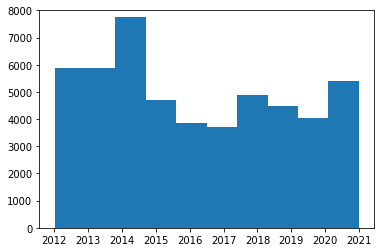

In [7]:
# coverage
plt.hist(bs_data["evtdate"], bins=10)
plt.ylim(0, 8000);

In [10]:
# most traded stocks
bs_data.groupby("ticker")["ticker"].count().sort_values(ascending=False)[:10]

ticker
AAPL    809
MSFT    620
GE      334
AMZN    328
QCOM    305
XOM     292
JNJ     282
T       278
SPY     276
GOOG    273
Name: ticker, dtype: int64